In [1]:
# Set the default path to the data directory, here you can change to your own path
import os
default_path = r'C:\self-assembly-alldata'
os.chdir(default_path)

#Create a folder figures under the default path
if not os.path.exists('figures'):
    os.makedirs('figures')

# Self-Assembly Music - Structures' Analysis

## 1. Number of structures over time

We plot here the average number of strutures for a session over time.

Functions for processing the data and plotting:

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to process the average number of structures over time, change paths as needed
def ProcessAverageStructureNumber(agents_size):
    folder_path = 'data/sync_struct_5_100/size-'+ str(agents_size) + '-join-5' # Change here as needed
    file_names = [file for file in os.listdir(folder_path) if file.startswith('STRUCT')]
    totalTime_sec = 300

    #from all  the files that can be open using the collection 'file names', 
    #group the data of every file by 'time', then get the count for every group from a file, 
    #then, average the count of all files per a period of time of 1 second

    timed_dic = {} # One element per second range
    for sec in range(1, totalTime_sec + 1):
        timed_dic[sec] = []

    for file_name in file_names:
        file_structs_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_structs_path)
        grouped_data_time_count = df.groupby('time').size().reset_index(name='count')
        last_count = agents_size
        for sec in range(1, totalTime_sec + 1):
            for index, row in grouped_data_time_count.iterrows():
                if row['time'] > sec:
                    break
                if row['time'] > sec - 1 and row['time'] <= sec:
                    last_count = row['count']
                    timed_dic[sec].append(last_count)  
            if len(timed_dic[sec]) == 0:
                timed_dic[sec].append(last_count)
        #break

    averages = [[np.mean(values), np.std(values)] for x, values in timed_dic.items()]
    return averages


def PlotAverageStructureNumber(agents_size, averages, save_file = False):
    # Extract the average and standard deviation values from the 'averages' list
    average_values = [item[0] for item in averages]
    std_values = [item[1] for item in averages]

    # Create a list of x-coordinates for the data points
    x = list(range(len(average_values)))

    # Plot the average values with error bars
    plt.errorbar(x, average_values, yerr=std_values, fmt='o', color = 'b', ecolor='orange', elinewidth=0.7, capsize=3, markersize=3)

    # Set the labels for the x-axis and y-axis
    plt.xlabel('Time (s)')
    plt.ylabel('Average Number of Structures')

    # Set the title of the graph
    title = 'Number of Structures Over Time ('+str(agents_size)+' Agents)'
    plt.title(title)

    # Join points with a line
    plt.plot(x, average_values, '-', color = 'b')

    if save_file:
        # Save the graph to a file
        filepath = 'figures/'
        plt.savefig(filepath + title + '.pdf', bbox_inches='tight')

     # Display the graph
    plt.show()    


We can process the data first before plotting. We are doing this for 50 agents. It takes some time to execute (for us was around 3.5 minutes).

In [3]:
agents_size = 50
averages = ProcessAverageStructureNumber(agents_size)

Plotting the results:

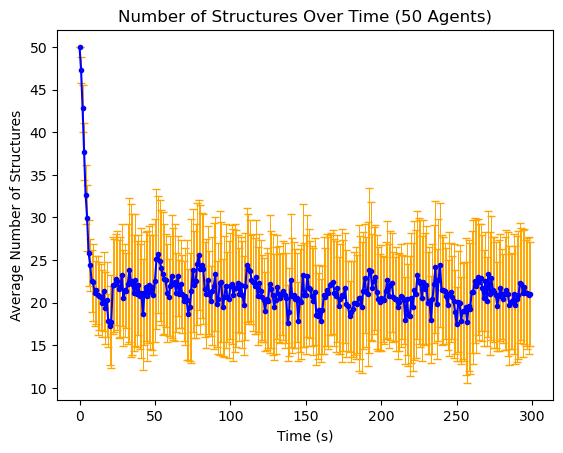

In [4]:
PlotAverageStructureNumber(agents_size, averages, save_file = True)

## 2. Number and Size of Structures varying "Join Time"

We plot the number and sizes of structures as explained in the paper according to some Tjmax values

Functions for calculation and plotting:

In [5]:

def PlotNumberAndSizeFromOneSet(file_structs_path, save_file = False, font_size_title = 12, font_size = 12):
    #file_structs_path = 'data/size-5/STRUCT-2024_04_28_13_50_19-N-5-minspeed-1-maxspeed-1-maxjointtime-5-joinradiusfactor-2-maxjointssize-6-radiusboundary-2-freq-1.csv'

    start_index = file_structs_path.find("N-") + 2  # Find the index where 'N-' ends
    end_index = file_structs_path.find("-ls")  # Find the index where '-file' starts
    agents_size = int(file_structs_path[start_index:end_index])  # Extract the substring between 'N-' and '-file'

    #extract maxjointtime from the file name
    start_index = file_structs_path.find("jt-") + 3  # Find the index where 'maxjointtime-' ends
    end_index = file_structs_path.find("-jr")  # Find the index where '-joinradiusfactor' starts
    maxjointtime = float(file_structs_path[start_index:end_index])  # Extract the substring between 'maxjointtime-' and '-joinradiusfactor'

    # Read the data from file_structs_path into a DataFrame
    df = pd.read_csv(file_structs_path)

    # Group the data by time and get the count of each group
    grouped_data_time = df.groupby('time').size().reset_index(name='count')
    grouped_data_time['count'] = grouped_data_time['count'] / agents_size

    # Plot the data
    plt.figure(figsize=(15, 4))
    plt.plot(grouped_data_time['time'], grouped_data_time['count'], color = 'b')


    # Group the data by time and get the count of each group
    #grouped_data_time = df.groupby('time')

    df['N_normalized'] = df['N'] / agents_size

    s = [3 for n in range(len(df['time']))]

    #plt.figure(figsize=(15, 5))
    plt.scatter(df['time'], df['N_normalized'], s=s, color='red')

    plt.ylim(0, 1)
    plt.xlabel('time')
    plt.ylabel('N')
    plt.title('N vs time')
    #plt.show()


    # Step 1: Group the DataFrame by 'time'
    grouped_df = df.groupby('time')

    # Step 2: Get the maximum 'N' value per group
    max_N_per_group = grouped_df['N'].max()

    # Step 3: Normalize the maximum 'N' values by dividing by agents_size
    normalized_N = max_N_per_group / agents_size

    # Step 4: Plot vertical lines for each unique 'time' value
    for time, norm_N in normalized_N.items():
        plt.axvline(x=time, color='orange', linestyle='-', linewidth=1, alpha=0.25, ymax=norm_N)

    # Add labels and title to the plot
    plt.xlabel('Time (s)', fontsize=font_size)
    plt.ylabel('Normalized Value', fontsize=font_size)
    #title = 'Normalized Number and Sizes of Structures Over Time ('+str(agents_size)+' Agents, Join Time = '+str(maxjointtime)+'s)'
    title = '('+str(agents_size)+' Agents, Join Time = '+str(maxjointtime)+'s)'
    plt.title(title, fontsize=font_size_title)

    plt.legend(['Number of Structures', 'Sizes of Structures'])

    if save_file:
            # Save the graph to a file
            filepath = 'figures/'
            file_title = title.replace(' ', '_').replace('=', '-')
            plt.savefig(filepath + file_title + '.pdf', bbox_inches='tight')

    # Show the plot
    plt.show()

def PlotNumberFromSet(file_structs_path):
    start_index = file_structs_path.find("N-") + 2  # Find the index where 'N-' ends
    end_index = file_structs_path.find("-ls")  # Find the index where '-file' starts
    agents_size = int(file_structs_path[start_index:end_index])  # Extract the substring between 'N-' and '-file'

    #extract maxjointtime from the file name
    start_index = file_structs_path.find("jt-") + 3  # Find the index where 'maxjointtime-' ends
    end_index = file_structs_path.find("-jr")  # Find the index where '-joinradiusfactor' starts
    maxjointtime = float(file_structs_path[start_index:end_index])  # Extract the substring between 'maxjointtime-' and '-joinradiusfactor'

    # Read the data from file_structs_path into a DataFrame
    df = pd.read_csv(file_structs_path)

    # Group the data by time and get the count of each group
    grouped_data_time = df.groupby('time').size().reset_index(name='count')
    grouped_data_time['count'] = grouped_data_time['count'] / agents_size

    # Plot the data
    plt.plot(grouped_data_time['time'], grouped_data_time['count'])

Plotting from folders:

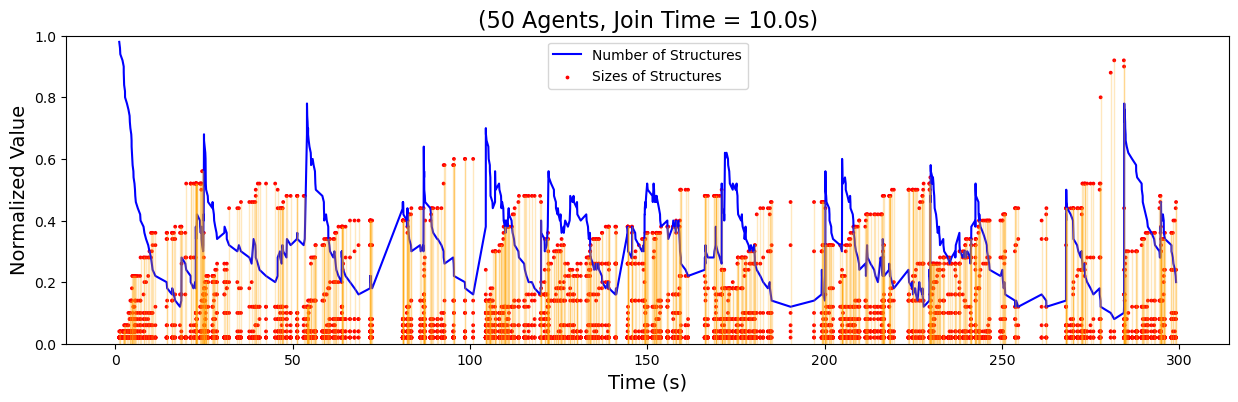

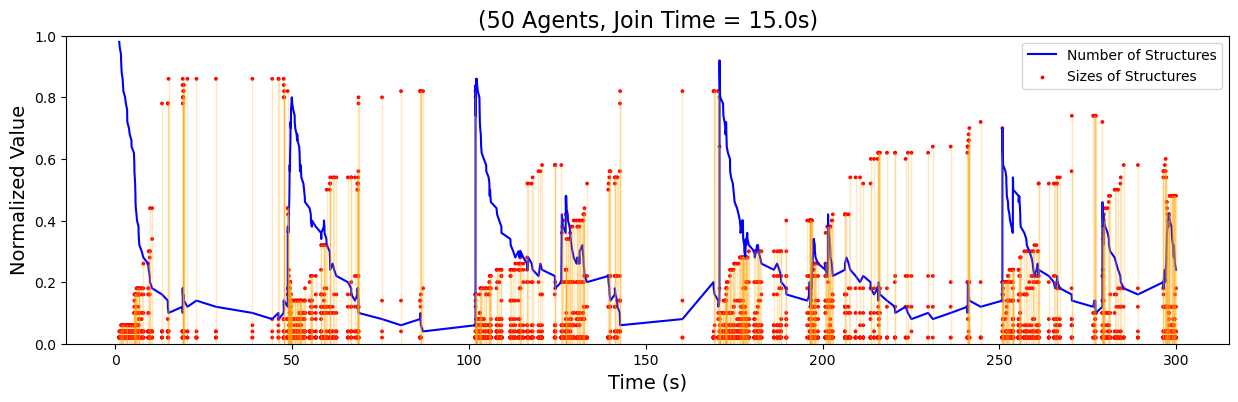

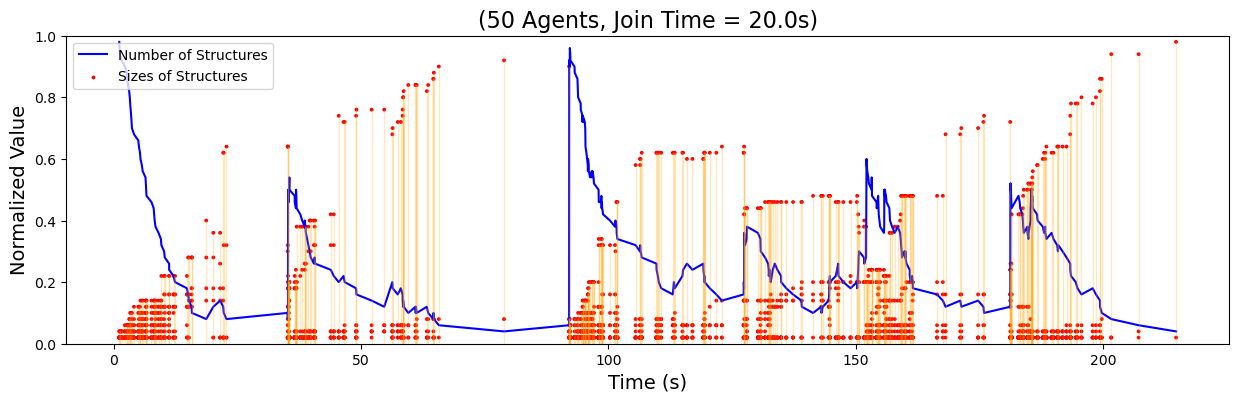

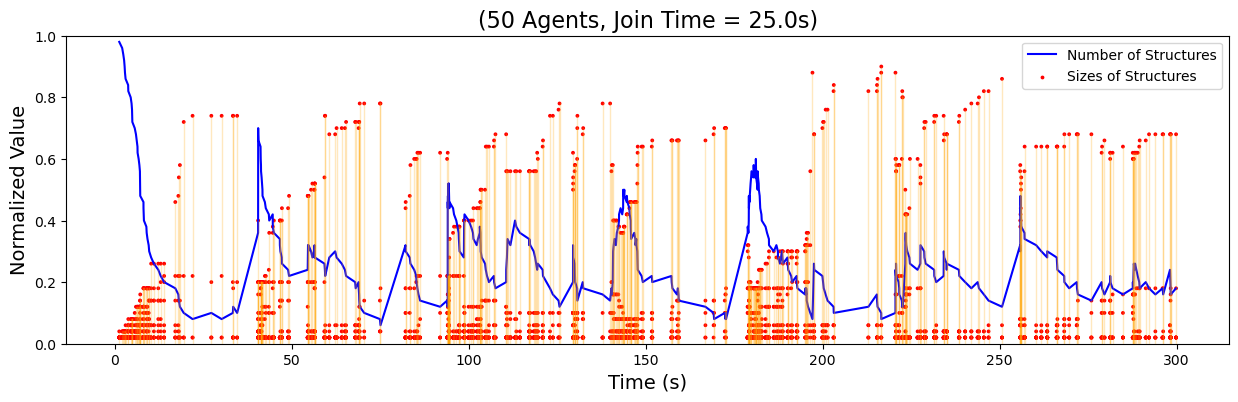

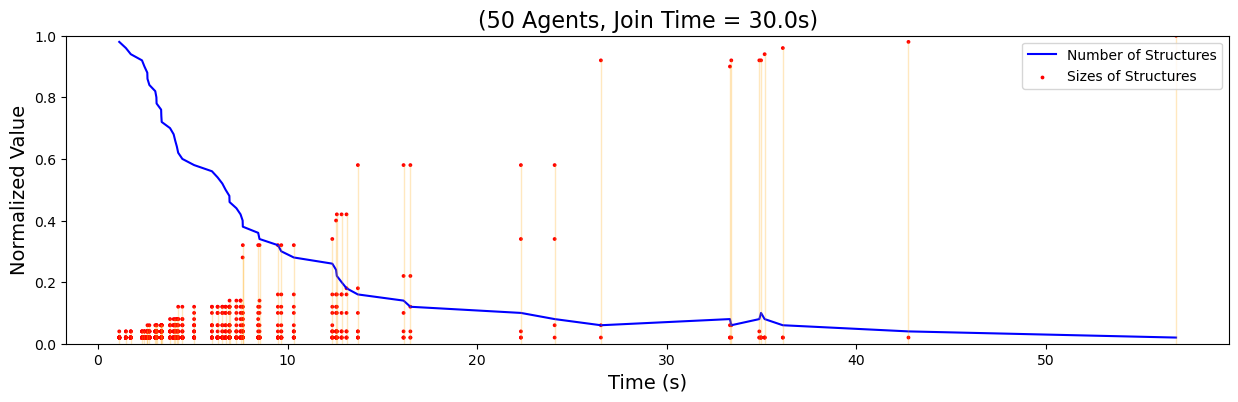

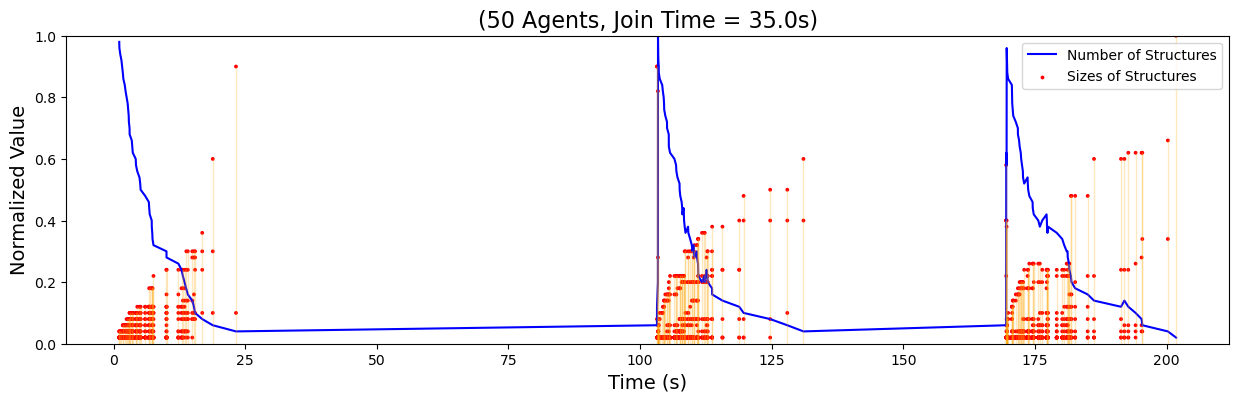

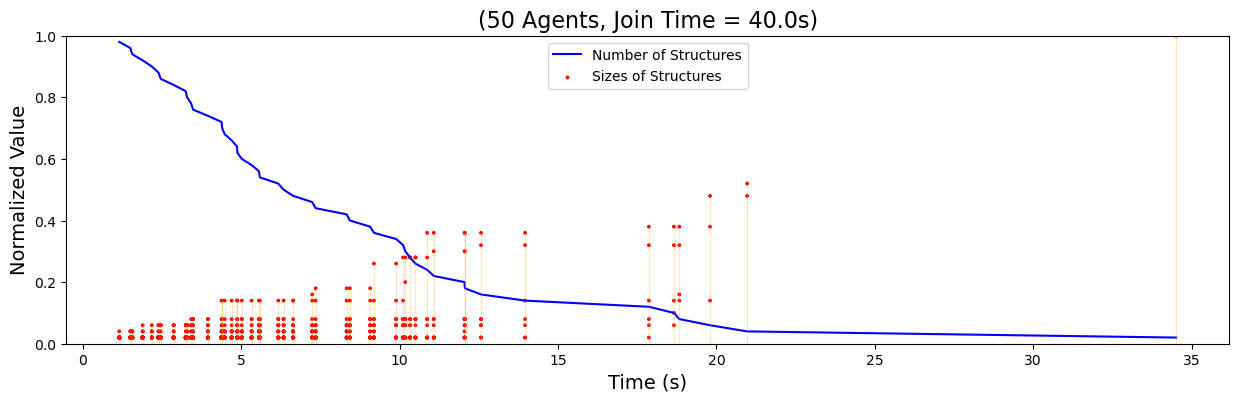

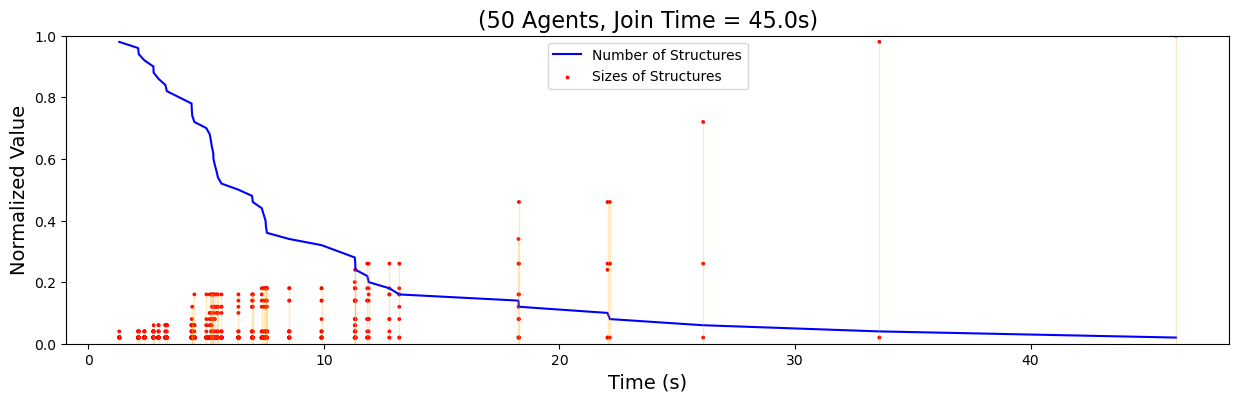

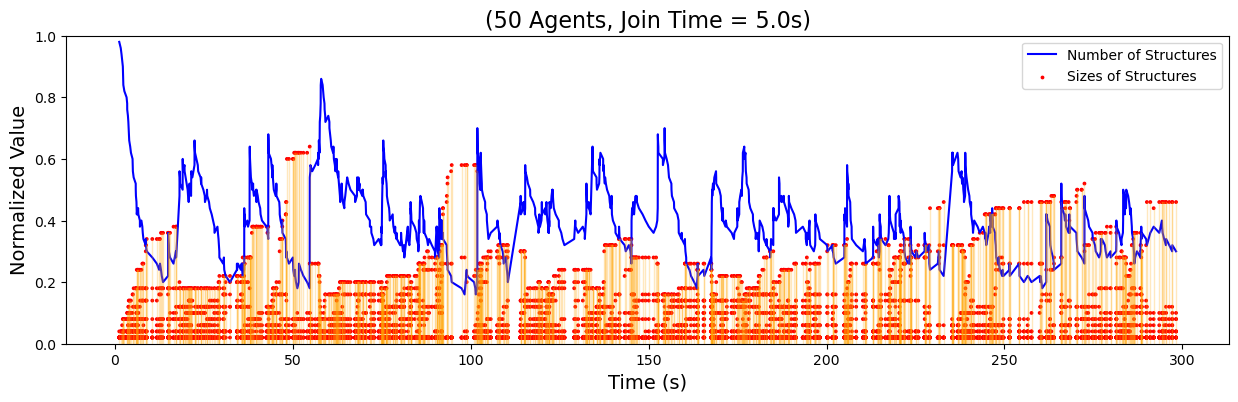

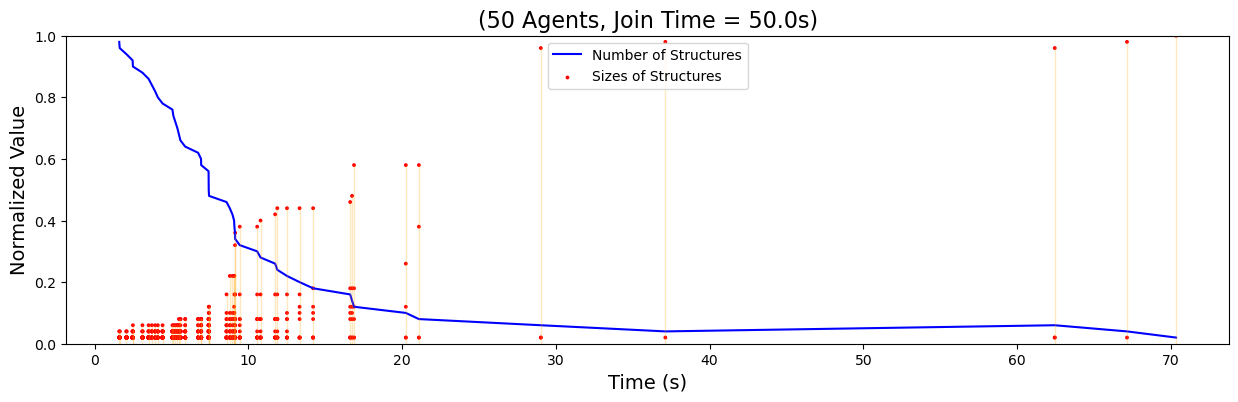

In [6]:
import os

parent_folder = 'data/sync_struct_50_join_5_50/'

# Get a list of all folders starting with 'size-50-join'
folders = [folder for folder in os.listdir(parent_folder) if folder.startswith('size-50-join')]

jointime_paths = []
# Iterate over the folders and find files starting with 'STRUCT'
for folder in folders:
    folder_path = os.path.join(parent_folder, folder)
    files = [file for file in os.listdir(folder_path) if file.startswith('STRUCT')]
    for file in files:
        jointime_paths.append(os.path.join(folder_path, file))


for jointime_path in jointime_paths:
    PlotNumberAndSizeFromOneSet(jointime_path, save_file = True, font_size_title=16, font_size = 14)

Plotting all in one only chart (It needs to be formatted better if used)

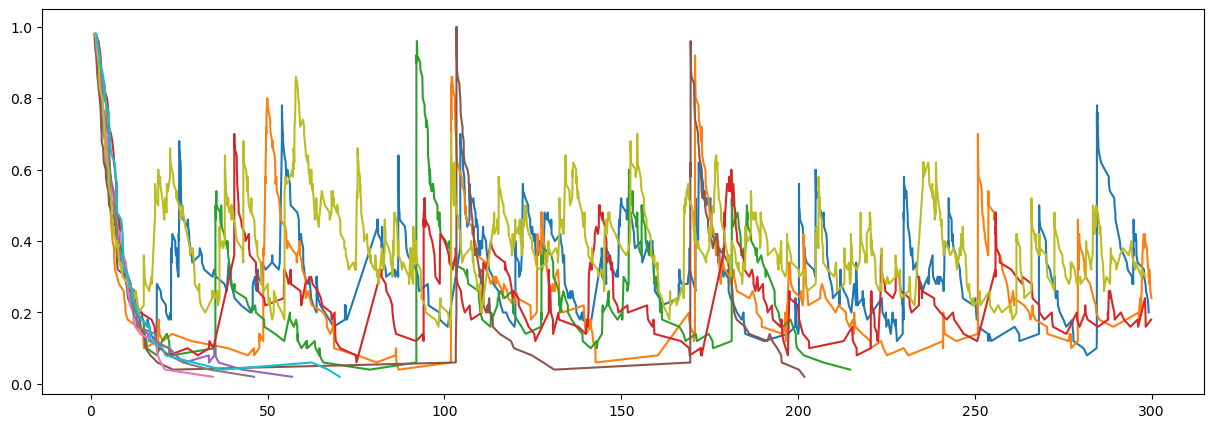

In [7]:
plt.figure(figsize=(15, 5))
for jointime_path in jointime_paths:
    PlotNumberFromSet(jointime_path)
plt.show()